In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('zoo.data', delimiter=',')
dataset.describe()

,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,0.420000,0.200000,0.590000,0.400000,0.240000,0.360000,0.55,0.600000,0.820000,0.79000,0.08000,0.170000,2.830000,0.750000,0.130000,0.43000,2.850000
std,0.496045,0.402015,0.494311,0.492366,0.429235,0.482418,0.50,0.492366,0.386123,0.40936,0.27266,0.377525,2.040276,0.435194,0.337998,0.49757,2.105188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,1.00000,0.00000,0.000000,2.000000,0.750000,0.000000,0.00000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00,1.000000,1.000000,1.00000,0.00000,0.000000,3.000000,1.000000,0.000000,0.00000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00,1.000000,1.000000,1.00000,0.00000,0.000000,4.000000,1.000000,0.000000,1.00000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.00000,1.00000,1.000000,8.000000,1.000000,1.000000,1.00000,7.000000


In [3]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
le = LabelEncoder()
y = le.fit_transform(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
results = []

# CART gini

In [7]:
criterion = 'gini'

classifier = DecisionTreeClassifier(criterion=criterion, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)
results.append({
    'classifier': 'CART', 
    'criterion': criterion,
    'accuracy_score': acc
    })

0.95


# ID3 C4.5 entropy

In [8]:
criterion = 'entropy'

classifier = DecisionTreeClassifier(criterion=criterion, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)
results.append({
    'classifier': 'C4.5',
    'criterion': criterion,
    'accuracy_score': acc
    })

0.95


# Extra Trees Classifier

In [9]:
criterions = ['gini', 'entropy', 'log_loss']
n_estimators_arr = [10, 20, 50, 100, 150]
etc_results = []

for criterion in criterions:
    for n_estimators in n_estimators_arr:
        classifier = ExtraTreesClassifier(criterion=criterion, n_estimators=n_estimators, random_state=1)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        etc_results.append({
            'criterion': criterion,
            'n_estimators': n_estimators, 
            'accuracy_score': accuracy_score(y_test, y_pred)})

result = max(etc_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Extra Trees Classifier'
results.append(result)

1.0


# Gradient Boosting

In [10]:
loss_arr = ['log_loss']
learning_rate_arr = [0.1, 0.2, 1]
n_estimators_arr = [50, 100, 150] #this param need to change
criterion_arr = ['friedman_mse', 'squared_error']
max_depth_arr = [2, 3, 4]
gb_results = []

for loss in loss_arr:
    for learning_rate in learning_rate_arr:
        for n_estimators in n_estimators_arr:
            for criterion in criterion_arr:
                for max_depth in max_depth_arr:
                    classifier = GradientBoostingClassifier(loss=loss, n_estimators=n_estimators, learning_rate=learning_rate, criterion=criterion, max_depth=max_depth, random_state=1)
                    classifier.fit(X_train, y_train)
                    y_pred = classifier.predict(X_test)
                    gb_results.append({
                        'loss': loss,
                        'learning_rate': learning_rate,
                        'n_estimators': n_estimators,
                        'criterion': criterion,
                        'max_depth': max_depth,
                        'accuracy_score': accuracy_score(y_test, y_pred)
                    })

result = max(gb_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Gradient Boosting'
results.append(result)

0.95


# Hist Gradient Boosting

In [11]:
learning_rate_arr = [0.1, 0.2, 0.5, 1]
max_iter_arr = [10, 50, 100, 150]
hgb_results = []

for learning_rate in learning_rate_arr:
    for max_iter in max_iter_arr:
        classifier = HistGradientBoostingClassifier(learning_rate=learning_rate, max_iter=max_iter, random_state=1)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        hgb_results.append({
            'learning_rate': learning_rate,
            'max_iter': max_iter,
            'accuracy_score': accuracy_score(y_test, y_pred)
        })

result = max(hgb_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Hist Gradient Boosting'
results.append(result)

1.0


# Random Forest gini

In [12]:
n_estimators_arr = [10, 20, 50, 100, 150]
criterion_arr = ['gini', 'entropy']
rf_results = []

for n_estimators in n_estimators_arr:
    for criterion in criterion_arr:
        classifier = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, random_state=1)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        rf_results.append({
            'n_estimators': n_estimators,
            'criterion': criterion,
            'accuracy_score': accuracy_score(y_test, y_pred)
        })

result = max(rf_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Random Forest'
results.append(result)

1.0


# Adaboost

In [13]:
n_estimators_arr = [10, 20, 50, 100, 150]
learning_rate_arr = [0.1, 0.2, 0.5, 1]
algorithm_arr = ['SAMME', 'SAMME.R']
ada_results = []

for n_estimators in n_estimators_arr:
    for learning_rate in learning_rate_arr:
        for algorithm in algorithm_arr:
            classifier = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm, random_state=0)
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            ada_results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'algorithm': algorithm,
                'accuracy_score': accuracy_score(y_test, y_pred)
            })

result = max(ada_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Adaboost'
results.append(result)

0.95


In [14]:
results

[{'classifier': 'CART', 'criterion': 'gini', 'accuracy_score': 0.95},
 {'classifier': 'C4.5', 'criterion': 'entropy', 'accuracy_score': 0.95},
 {'criterion': 'gini',
  'n_estimators': 10,
  'accuracy_score': 1.0,
  'classifier': 'Extra Trees Classifier'},
 {'loss': 'log_loss',
  'learning_rate': 0.1,
  'n_estimators': 50,
  'criterion': 'friedman_mse',
  'max_depth': 2,
  'accuracy_score': 0.95,
  'classifier': 'Gradient Boosting'},
 {'learning_rate': 0.2,
  'max_iter': 150,
  'accuracy_score': 1.0,
  'classifier': 'Hist Gradient Boosting'},
 {'n_estimators': 10,
  'criterion': 'gini',
  'accuracy_score': 1.0,
  'classifier': 'Random Forest'},
 {'n_estimators': 50,
  'learning_rate': 1,
  'algorithm': 'SAMME',
  'accuracy_score': 0.95,
  'classifier': 'Adaboost'}]

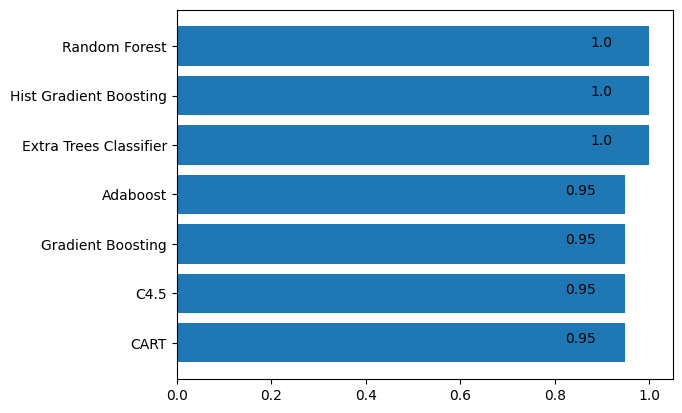

In [15]:
plt.rcdefaults()
fig, ax = plt.subplots()

df = pd.DataFrame(results)

df_sorted = df.sort_values('accuracy_score')

ax.barh('classifier', 'accuracy_score', data=df_sorted)
for i in range(len(results)):
    ax.text(results[i]['accuracy_score'] * 0.9, results[i]['classifier'], round(results[i]['accuracy_score'], 4), ha='center', color='black')
